# Result Explore

In [15]:
import pandas as pd
import re
import numpy as np

In [2]:
dfs = dict()
for pool_idx in [1,4,8,9,12,13,14,16,20,23, 24, 26]:
    dfs[pool_idx] = pd.read_excel("./data_explore/pool_data_statistics.xlsx", sheet_name=f'Pool{pool_idx}')

In [3]:
dfs.keys()

dict_keys([1, 4, 8, 9, 12, 13, 14, 16, 20, 23, 24, 26])

In [4]:
dfs[1]

,Model_Name,"MSE(Avg, Median)","MAE(Avg., Median)","RSE(Avg., Median)"
0,NLinear,0.357 (0.356),0.3 (0.3),0.554 (0.554)
1,Multi-Patch,0.426 (0.442),0.339 (0.345),0.426 (0.442)
2,DLinear,0.428 (0.428),0.392 (0.392),0.607 (0.608)
3,Patch-TST,0.456 (0.456),0.364 (0.367),0.627 (0.627)
4,TimesMixer,0.492 (0.487),0.375 (0.375),0.651 (0.648)
5,iTransformer,0.671 (0.691),0.439 (0.439),0.671 (0.691)
6,Autoformer,0.763 (0.763),0.497 (0.494),0.811 (0.811)
7,Mamba,0.812 (0.809),0.568 (0.566),0.837 (0.835)
8,Informer,3.306 (3.441),1.527 (1.498),1.687 (1.722)
9,LSTM,2.091 (2.158),1.123 (1.153),1.535 (1.561)


In [5]:
(dfs[1].loc[:, ["MSE(Avg, Median)", "MAE(Avg., Median)", "RSE(Avg., Median)"]]).map(lambda x: float(re.findall(r'\d+\.\d+', x)[0]))

,"MSE(Avg, Median)","MAE(Avg., Median)","RSE(Avg., Median)"
0,0.357,0.300,0.554
1,0.426,0.339,0.426
2,0.428,0.392,0.607
3,0.456,0.364,0.627
4,0.492,0.375,0.651
5,0.671,0.439,0.671
6,0.763,0.497,0.811
7,0.812,0.568,0.837
8,3.306,1.527,1.687
9,2.091,1.123,1.535


In [6]:
df_avg = dict()
df_med = dict()
for key in dfs.keys():
    print(key)
    df_avg[key]= (dfs[key].loc[:, ["MSE(Avg, Median)", "MAE(Avg., Median)", "RSE(Avg., Median)"]]).map(lambda x: float(re.findall(r'\d+\.\d+', x)[0]))
    df_avg[key]["Model_Name"] = dfs[key].iloc[:,0]

    df_med[key]= (dfs[key].loc[:, ["MSE(Avg, Median)", "MAE(Avg., Median)", "RSE(Avg., Median)"]]).map(lambda x: float(re.findall(r'\d+\.\d+', x)[1]))
    df_med[key]["Model_Name"] = dfs[key].iloc[:,0]    

1
4
8
9
12
13
14
16
20
23
24
26


In [7]:
# df_rank_mse = {'avg':{}, 'med':{}}
# df_rank_mae = {'avg':{}, 'med':{}}
# df_rank_rse = {'avg':{}, 'med':{}}

for key in df_avg.keys():
    df_avg[key]['avg_mse_rank'] = df_avg[key]['MSE(Avg, Median)'].rank(ascending=True)
    df_avg[key]['avg_mae_rank'] = df_avg[key]['MAE(Avg., Median)'].rank(ascending=True)
    df_avg[key]['avg_rse_rank'] = df_avg[key]['RSE(Avg., Median)'].rank(ascending=True)

    df_med[key]['med_mse_rank'] = df_med[key]['MSE(Avg, Median)'].rank(ascending=True)
    df_med[key]['med_mae_rank'] = df_med[key]['MAE(Avg., Median)'].rank(ascending=True)
    df_med[key]['med_rse_rank'] = df_med[key]['RSE(Avg., Median)'].rank(ascending=True)

In [9]:
df_med[1]

,"MSE(Avg, Median)","MAE(Avg., Median)","RSE(Avg., Median)",Model_Name,med_mse_rank,med_mae_rank,med_rse_rank
0,0.356,0.300,0.554,NLinear,1.0,1.0,2.0
1,0.442,0.345,0.442,Multi-Patch,3.0,2.0,1.0
2,0.428,0.392,0.608,DLinear,2.0,5.0,3.0
3,0.456,0.367,0.627,Patch-TST,4.0,3.0,4.0
4,0.487,0.375,0.648,TimesMixer,5.0,4.0,5.0
5,0.691,0.439,0.691,iTransformer,6.0,6.0,6.0
6,0.763,0.494,0.811,Autoformer,7.0,7.0,7.0
7,0.809,0.566,0.835,Mamba,8.0,8.0,8.0
8,3.441,1.498,1.722,Informer,10.0,10.0,10.0
9,2.158,1.153,1.561,LSTM,9.0,9.0,9.0


In [10]:
df_med.keys()

dict_keys([1, 4, 8, 9, 12, 13, 14, 16, 20, 23, 24, 26])

In [18]:
(df_avg[1].loc[:, ["avg_mse_rank", "avg_mae_rank", "avg_rse_rank"]]).apply(lambda x: np.round(np.mean(x),1), axis=1)

0     1.3
1     1.7
2     3.7
3     3.7
4     4.7
5     6.0
6     7.0
7     8.0
8    10.0
9     9.0
dtype: float64

In [21]:
mean_rank_avg = []
mean_rank_med = []
for key in df_avg.keys():
    avg_rank = (df_avg[key].loc[:, ["avg_mse_rank", "avg_mae_rank", "avg_rse_rank"]]).apply(lambda x: np.round(np.mean(x),1), axis=1)
    model_names = df_avg[key]["Model_Name"]
    mean_rank_avg.append(dict(zip(model_names, avg_rank)))

    avg_rank = (df_med[key].loc[:, ["med_mse_rank", "med_mae_rank", "med_rse_rank"]]).apply(lambda x: np.round(np.mean(x),1), axis=1)
    model_names = df_med[key]["Model_Name"]
    mean_rank_med.append(dict(zip(model_names, avg_rank)))


index_ = [f"pool_{x}" for x in [1, 4, 8, 9, 12, 13, 14, 16, 20, 23, 24, 26]]


In [24]:
global_rank_med = pd.DataFrame(mean_rank_med, index = index_)
global_rank_avg = pd.DataFrame(mean_rank_avg, index = index_)

In [25]:
global_rank_med

,NLinear,Multi-Patch,DLinear,Patch-TST,TimesMixer,iTransformer,Autoformer,Mamba,Informer,LSTM
pool_1,1.3,2.0,3.3,3.7,4.7,6.0,7.0,8.0,10.0,9.0
pool_4,3.7,2.3,6.7,5.7,2.0,4.7,10.0,8.7,8.3,3.0
pool_8,9.7,3.7,4.0,5.3,3.7,3.3,7.0,5.7,7.3,5.3
pool_9,8.7,7.0,5.7,6.0,5.0,3.7,4.0,7.0,3.3,4.7
pool_12,1.0,2.3,4.3,4.7,2.7,6.0,8.0,7.0,9.0,10.0
pool_13,2.3,2.0,4.3,1.7,6.0,4.7,8.0,7.0,9.7,9.3
pool_14,2.0,1.0,4.3,4.7,3.0,6.0,7.7,7.3,9.0,10.0
pool_16,1.0,2.0,4.7,3.0,5.7,4.7,7.0,8.0,9.7,9.3
pool_20,5.2,1.8,3.3,7.3,3.0,4.0,4.3,7.0,10.0,9.0
pool_23,1.3,3.0,4.3,7.7,1.7,4.7,7.3,6.0,9.0,10.0


In [26]:
global_rank_avg

,NLinear,Multi-Patch,DLinear,Patch-TST,TimesMixer,iTransformer,Autoformer,Mamba,Informer,LSTM
pool_1,1.3,1.7,3.7,3.7,4.7,6.0,7.0,8.0,10.0,9.0
pool_4,3.7,2.3,6.7,5.7,2.0,4.7,10.0,8.7,8.3,3.0
pool_8,9.8,3.7,3.8,5.0,3.3,3.3,7.0,6.0,7.7,5.3
pool_9,9.3,7.0,5.7,6.0,5.0,3.7,4.0,6.3,3.7,4.3
pool_12,1.0,2.3,3.8,4.7,3.2,6.0,8.0,7.0,9.0,10.0
pool_13,2.3,2.0,4.3,1.7,6.0,4.7,8.0,7.0,9.7,9.3
pool_14,1.0,5.0,3.8,3.2,2.0,6.0,8.0,7.0,9.0,10.0
pool_16,1.0,2.0,4.7,3.0,5.7,4.7,7.3,7.7,9.7,9.3
pool_20,5.0,2.0,3.3,7.3,3.0,4.0,4.3,7.0,10.0,9.0
pool_23,1.3,3.0,4.3,6.7,1.7,5.3,8.0,5.7,9.0,10.0


In [31]:
across_rank_avg = global_rank_avg.apply(lambda x: np.round(np.mean(x),1), axis=0)
across_rank_avg

NLinear         3.9
Multi-Patch     3.1
DLinear         4.1
Patch-TST       4.7
TimesMixer      3.8
iTransformer    5.0
Autoformer      7.2
Mamba           6.6
Informer        8.3
LSTM            8.2
dtype: float64

In [30]:
across_rank_med = global_rank_med.apply(lambda x: np.round(np.mean(x),1), axis=0)
across_rank_med

NLinear         3.9
Multi-Patch     2.8
DLinear         4.1
Patch-TST       5.0
TimesMixer      3.9
iTransformer    4.9
Autoformer      7.1
Mamba           6.7
Informer        8.2
LSTM            8.2
dtype: float64

# Across Pool Loss

In [43]:
df_avg[1].loc[:, ["Model_Name", "MSE(Avg, Median)", "MAE(Avg., Median)", "RSE(Avg., Median)"]].to_dict(orient="records")

[{'Model_Name': 'NLinear',
  'MSE(Avg, Median)': 0.357,
  'MAE(Avg., Median)': 0.3,
  'RSE(Avg., Median)': 0.554},
 {'Model_Name': 'Multi-Patch',
  'MSE(Avg, Median)': 0.426,
  'MAE(Avg., Median)': 0.339,
  'RSE(Avg., Median)': 0.426},
 {'Model_Name': 'DLinear',
  'MSE(Avg, Median)': 0.428,
  'MAE(Avg., Median)': 0.392,
  'RSE(Avg., Median)': 0.607},
 {'Model_Name': 'Patch-TST',
  'MSE(Avg, Median)': 0.456,
  'MAE(Avg., Median)': 0.364,
  'RSE(Avg., Median)': 0.627},
 {'Model_Name': 'TimesMixer',
  'MSE(Avg, Median)': 0.492,
  'MAE(Avg., Median)': 0.375,
  'RSE(Avg., Median)': 0.651},
 {'Model_Name': 'iTransformer',
  'MSE(Avg, Median)': 0.671,
  'MAE(Avg., Median)': 0.439,
  'RSE(Avg., Median)': 0.671},
 {'Model_Name': 'Autoformer',
  'MSE(Avg, Median)': 0.763,
  'MAE(Avg., Median)': 0.497,
  'RSE(Avg., Median)': 0.811},
 {'Model_Name': 'Mamba',
  'MSE(Avg, Median)': 0.812,
  'MAE(Avg., Median)': 0.568,
  'RSE(Avg., Median)': 0.837},
 {'Model_Name': 'Informer',
  'MSE(Avg, Median)': 3

In [45]:
total_record = dict()
for pool_id in df_avg.keys():
    res_list = df_avg[pool_id].loc[:, ["Model_Name", "MSE(Avg, Median)", "MAE(Avg., Median)", "RSE(Avg., Median)"]].to_dict(orient="records")
    for record in res_list:
        model_name = record["Model_Name"]
        mse = record["MSE(Avg, Median)"]
        mae = record["MAE(Avg., Median)"]
        rse = record["RSE(Avg., Median)"]

        if model_name in total_record.keys():
            total_record[model_name]["MSE(Avg, Median)"].append(mse)
            total_record[model_name]["MAE(Avg., Median)"].append(mae)
            total_record[model_name]["RSE(Avg., Median)"].append(rse)
        else:
            total_record[model_name] = {"MSE(Avg, Median)":[], "MAE(Avg., Median)":[], "RSE(Avg., Median)":[]}
            total_record[model_name]["MSE(Avg, Median)"].append(mse)
            total_record[model_name]["MAE(Avg., Median)"].append(mae)
            total_record[model_name]["RSE(Avg., Median)"].append(rse)

In [49]:
import copy

In [50]:
total_record_copy = copy.deepcopy(total_record)


In [52]:
for model in total_record.keys():
    for loss in total_record[model].keys():
        total_record_copy[model][loss] = np.round(np.mean(total_record[model][loss]),3)

In [65]:
pd.DataFrame(total_record_copy).transpose()

,"MSE(Avg, Median)","MAE(Avg., Median)","RSE(Avg., Median)"
NLinear,1.169,0.596,0.792
Multi-Patch,1.117,0.592,0.781
DLinear,1.129,0.644,0.795
Patch-TST,1.162,0.608,0.820
TimesMixer,1.154,0.602,0.820
iTransformer,1.178,0.627,0.854
Autoformer,1.336,0.726,0.944
Mamba,1.380,0.688,0.943
Informer,2.156,1.102,1.565
LSTM,2.202,1.154,1.996


# Pool time series sampling - visualization

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 


from sklearn.preprocessing import StandardScaler
file_name = "/home/yixin/work/msxf/CQU_TimeSeries_Algo/MultiPatch_super/dataset/one_for_one_pool_24.csv"
df = pd.read_csv(file_name)
df.head()


,pool_id,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
0,24,1706518809,0.38,13.47,22117007360,80127983616
1,24,1706522408,0.38,13.47,22039805952,80127983616
2,24,1706526009,0.38,13.47,22163259392,80127983616
3,24,1706529609,0.38,13.47,22077550592,80127983616
4,24,1706533209,0.38,13.47,22218387456,80127983616


In [26]:
scaler = StandardScaler()
df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
df.head()

/tmp/ipykernel_27035/3119203760.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.06292723 -1.06384865 -1.0623752  ...  1.38789131  1.39424946
  1.40756904]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
/tmp/ipykernel_27035/3119203760.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.09228556 -1.09228556 -1.09228556 ...  1.15596617  1.15596617
  1.15596617]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])


,pool_id,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
0,24,1706518809,-1.130715,-1.49612,-1.062927,-1.092286
1,24,1706522408,-1.130715,-1.49612,-1.063849,-1.092286
2,24,1706526009,-1.130715,-1.49612,-1.062375,-1.092286
3,24,1706529609,-1.130715,-1.49612,-1.063398,-1.092286
4,24,1706533209,-1.130715,-1.49612,-1.061717,-1.092286


In [27]:
columns = df.columns[2:]
print("columns: ",columns)
input_length = 336
pred_length=192
total_length = input_length + pred_length
range_min = 0
range_max = df.shape[0] - total_length
sample_num = 10




columns:  Index(['cpu_usage', 'cpu_allocated', 'mem_use', 'mem_allocated'], dtype='object')


In [28]:
# Function to generate a seaborn lineplot for each set of train and prediction data
def plot_timeseries(ax, y_input, y_pred, idx):
    x = list(range(len(y_input)+len(y_pred)))  # x-axis as the range of the length of y_train or y_pred
    df = pd.DataFrame({
        'x': x,
        'y': y_input + y_pred,
        'label': ['Train'] * len(y_input) + ['Prediction'] * len(y_pred)
    })
    sns.lineplot(data=df, x='x', y='y', hue='label', ax=ax)
    ax.set_title(f"Plot {idx+1}")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Value")

In [51]:
start_idxs = np.random.choice(np.arange(range_min, range_max), sample_num, replace=False)
index_list = [[int(x), int(x)+input_length, int(x)+total_length] for x in start_idxs]


In [52]:
print(index_list)

[[35, 371, 563], [2943, 3279, 3471], [244, 580, 772], [2592, 2928, 3120], [142, 478, 670], [2094, 2430, 2622], [1732, 2068, 2260], [1625, 1961, 2153], [959, 1295, 1487], [2395, 2731, 2923]]


In [55]:
index_list = [[3060, 3396, 3588],
[2554, 2890, 3082],
[390, 726, 918],
[773, 1109, 1301],
[1865, 2201, 2393],
[3110, 3446, 3638],
[1015, 1351, 1543],
[208, 544, 736],
[2194, 2530, 2722],
[35, 371, 563]]

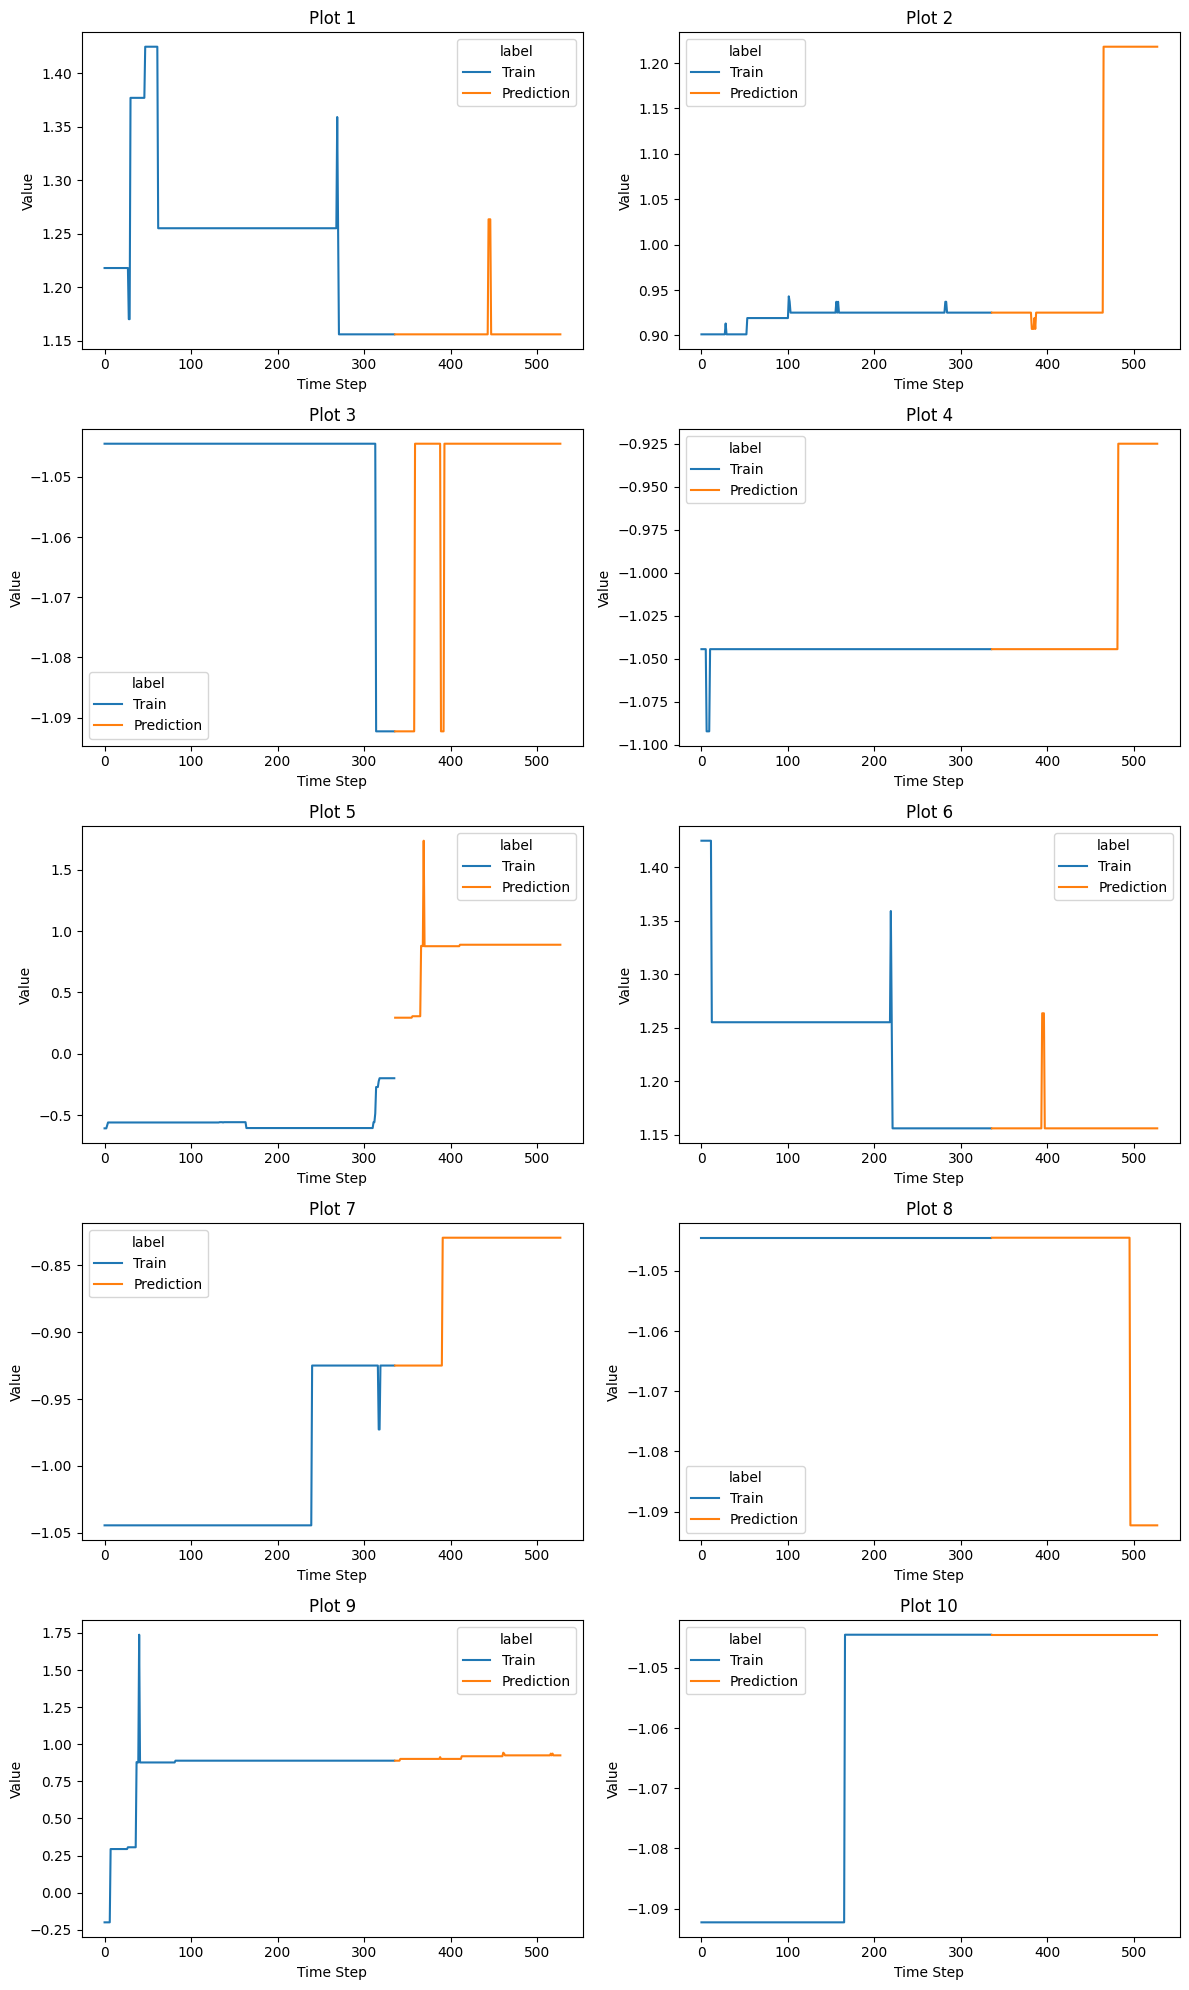

In [59]:


choose_column = 'mem_allocated' #  "cpu_usage", 'cpu_allocated', 'mem_use', 'mem_allocated', 
train_data_list = []
pred_data_list = []

for idx in index_list:
    input_ = df[choose_column][idx[0]:idx[1]].tolist()
    pred_ = df[choose_column][idx[1]:idx[2]].tolist()
    train_data_list.append(input_)
    pred_data_list.append(pred_)

n_plots = len(train_data_list)  # We assume 10 sets here
n_cols = 2                      # Number of columns (for layout)
n_rows = n_plots // n_cols       # Calculate the number of rows

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows/columns

# Plot each time series on a separate subplot
for i in range(n_plots):
    plot_timeseries(axes[i], train_data_list[i], pred_data_list[i], i)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:


# Example data: you can replace this with your actual 10 sets of data
train_data_list = [
    [1.2, 2.4, 3.5, 4.6, 5.0, 6.2],
    [1.1, 2.2, 3.3, 4.5, 5.2, 6.1],
    # ... add 8 more sets
] * 5  # Example: repeating same data to make 10 sets
pred_data_list = [
    [1.0, 2.5, 3.6, 4.4, 5.1, 6.0],
    [0.9, 2.1, 3.4, 4.2, 5.0, 6.3],
    # ... add 8 more sets
] * 5  # Example: repeating same data to make 10 sets

# Set up the number of subplots
n_plots = len(train_data_list)  # We assume 10 sets here
n_cols = 2                      # Number of columns (for layout)
n_rows = n_plots // n_cols       # Calculate the number of rows

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows/columns

# Plot each time series on a separate subplot
for i in range(n_plots):
    plot_timeseries(axes[i], train_data_list[i], pred_data_list[i], i)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()
